In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../../modules')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Markov Decision Processes
Many problems require making a set of sequential decisions (e.g chess, go, card games). <br>
One of the approaches to dealing with sequential problems is to assume a markov condition. In a markov decision process(MDP) we have a set of actions $A$ and a set of states $S$. Iteratively at each timestep we make an action which transitions the current state $S_t$ to a new state $S_{t+1}$ with a probability $P(S_{t+1}|S_t,A_t)$. At each timestep a reward value $R_t$ is given based on the current state and action with probability $P(R_t|S_t,A_t)$. The markov condition is that the next state only depends on the current state and current action.

When we make a finite number of decisions the utility (which we want to maximize) is given as the sum of rewards at all timesteps, $\sum_{t=1}^n R_t$. With an infinite set of steps this becomes infinite, so often a discount factor is included which grows with time, $\sum_{t=1}^\infty \lambda^{t-1} R_t$. Alternatively we can use an average instead, but that can be computationally difficult. 

Because we don't know the reward at each given time step we need to take an expectation over all possible rewards so the above becomes $\sum_{t=1}^\infty \lambda^{t-1} \sum_i P(R_t^i)R_t^i$. Because of the markov condition we know the probability of $R_t$ given $S_t$ and $A_t$ and can rewrite this as:
$$\sum_{t=1}^\infty \lambda^{t-1} \sum_i P(R_t^i|S_t,A_t)R_t^i$$

While there are non-stationary MDPs it is useful to assume $P(S_{t+1}|S_t,A_t)$ and $P(R_t|S_t,A_t)$ are the same for all $t$. Stationary MDPs can have the transition from one state to another determined by a function $T(s'|s,a)$ which doesn't depend on $t$. The expectation over the reward given the current state $s$ and executing action function $a$ is $R(s,a)$. So the above is:
$$\sum_{t=1}^\infty \lambda^{t-1} R(S_t,A_t)$$

In a MDP problem we are trying to find a good policy, which tells us which action to take given previous actions and the current state. With an infinite time stationary MDP we get policies not depending on $t$. We call the stationary policy $\pi$, which maps state to action $\pi(s)$. We also have a stationary transition function $T(s'|s,a)$ which is the probability of moving from a state and action to a new state.

With this in mind the above overall utility function can be written:
$$\sum_{t=1}^\infty \lambda^{t-1} R(S_t,\pi(S_t))$$
Let $U_k^\pi(s)=\sum_{t=1}^k \lambda^{t-1} R(S_t,\pi(S_t))$ with starting state $S_1$ (counting $t$ from 1 **relative** to $s$, so $S_1$=$s$). <br>
So, $U_1^\pi(s)=R(s,\pi(s))$<br>
Then $U_\infty^\pi(s)$ is the value we want to maximize. <br>
$$
\begin{aligned}
    U_{k+1}^\pi(s)&=\sum_{t=1}^{k+1} \lambda^{t-1} R(S_t,\pi(S_t)) \\
    &= R(s,\pi(s)) + \lambda \sum_{t=2}^{k+1} \lambda^{t-1} R(S_t,\pi(S_t)) \\
    &= R(s,\pi(s)) + \lambda U_k^\pi(s')
\end{aligned}
$$
Where $s'$ is the state that follows $s$. However, as we don't know the actual value of $s'$ we use the expectation:
$$U_{k+1}^\pi(s)=R(s,\pi(s)) + \lambda \sum_{s'} T(s'|s,\pi(s)) U_k^\pi(s')$$
This formula is very intuitive. The value of a state ($U^\pi(s)$) is the immediate reward plus the expected value of the probable future states.

For an infinite horizon the solution for $U^\pi$ can be found iteratively:
$$U^\pi=R(s,\pi(s))+\lambda\sum_{s'}T(s'|s,\pi(s))U^\pi(s')$$

### Evaluating a simple decision:
**W** is a wall <br>
**F** is a fire <br>
**G** is gold <br>
**S** is empty <br>
**Y** is you.

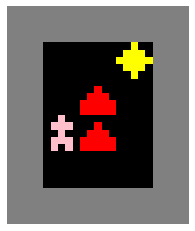

In [40]:
world = np.array([['W','W','W','W','W'],
                  ['W','S','S','G','W'],
                  ['W','S','F','S','W'],
                  ['W','Y','F','S','W'],
                  ['W','S','S','S','W'],
                  ['W','W','W','W','W']])


def display_world(world):
    wall_tile = np.ones((5,5))
    empty_tile = np.zeros((5,5))
    you_tile = np.array([[0,0,1,0,0],
                         [0,1,1,1,0],
                         [0,0,1,0,0],
                         [0,1,1,1,0],
                         [0,1,0,1,0]])*2
    gold_tile = np.array([[0,0,1,0,0],
                          [0,1,1,1,0],
                          [1,1,1,1,1],
                          [0,1,1,1,0],
                          [0,0,1,0,0]])*3
    fire_tile = np.array([[0,0,0,0,0],
                          [0,0,1,0,0],
                          [0,1,1,1,0],
                          [1,1,1,1,1],
                          [1,1,1,1,1]])*4
    tile_dict = dict(zip(['W','S','Y','G','F'],[wall_tile,empty_tile,you_tile,gold_tile,fire_tile]))

    image = np.zeros((world.shape[0]*5,world.shape[1]*5))
    for row in range(world.shape[0]):
        for col in range(world.shape[1]):
            tile = tile_dict[world[row,col]]
            image[row*5:(row+1)*5,col*5:(col+1)*5]=tile
    colormap =  colors.ListedColormap(['black','grey','pink','yellow','red'])
    plt.imshow(image,cmap=colormap)
    plt.axis(False)
    plt.show()
            
display_world(world)